# Notebook 7: The rule of Vs

The relationships between the orientation of a plane and topography are summarized in a set of rules, collectively called the rule of Vs, by which the amount and direction of dip can be estimated from the plane's outcrop pattern. Wherever the plane crosses a valley, the resulting outcrop trace is characteristic of the orientation of the plane.

This notebook illustrates the rule of Vs using the topography of a valley, and the [outcrop_trace](../functions/outcrop_trace.py) function to determine the outcrop trace of a plane. Let's begin by importing the required libraries:

Now let's read the elevation contours of the valley, draw the topographic map, and define and plot a location where the plane outcrops:

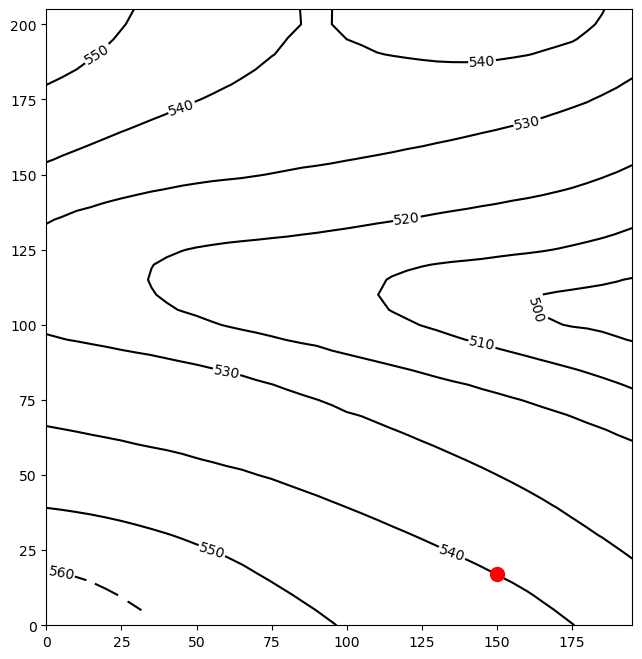

In [1]:
# import required libraries and functions
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

# read elevation contours of the valley
path = os.path.join("..", "data", "nb7_valley.txt") # a safe path to the file
contours = np.loadtxt(path)

# extract E, N and U coordinates
x_topo = contours[:,0] # 1st column E
y_topo = contours[:,1] # 2nd column N
z_topo = contours[:,2] # 3rd column U

# make a grid
x_points = np.arange(0, 200, 5) # points along E
y_points = np.arange(0, 210, 5) # points along N
XG, YG = np.meshgrid(x_points, y_points) # E and N coordinates of points in grid

# interpolate data to make DEM grid, we try the cubic method
ZG = si.griddata((x_topo, y_topo), z_topo, (XG, YG), method='cubic')

# contour the elevation data
fig, ax = plt.subplots(figsize=(10,8)) # make figure
c_levels = np.arange(500, 570, 10) # contour levels
cs = ax.contour(XG,YG,ZG,levels=c_levels, colors='black') # contour grid
ax.clabel(cs)

# define and plot the location where the plane outcrops
point1 = np.array([150, 17, 540]) # E, N, U coordinates
ax.plot(point1[0], point1[1],'ro', markersize=10)

# make axes equal
ax.axis('scaled')

# show the plot
plt.show()

Let's start with a horizontal plane. The outcrop trace of a horizontal plane should follow the topographic contours, since each topographic contour is the intersection of a horizontal plane of a given elevation with the topography.

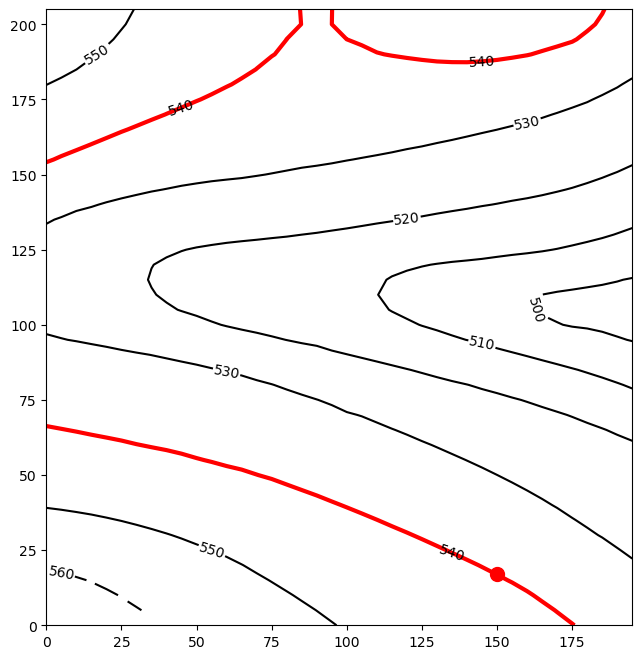

In [2]:
# this makes visible our functions folder
sys.path.append(os.path.abspath("../functions"))

# import our function
from outcrop_trace import outcrop_trace

# outcrop trace of horizontal plane
strike, dip = np.radians([180, 0]) 
DG = outcrop_trace(strike,dip,point1,XG,YG,ZG)

# plot topo map 
fig, ax = plt.subplots(figsize=(10,8)) # make figure
cs = ax.contour(XG,YG,ZG,levels=c_levels, colors='black') # contour grid
ax.clabel(cs)

# plot outcrop point
ax.plot(point1[0],point1[1],'ro', markersize=10)

# plot outcrop trace = contour zero value of DG
ax.contour(XG,YG,DG,levels=0,colors='red',linewidths=3)

# make axes equal
ax.axis('scaled')

# show the plot
plt.show()

And that is the case. Let's look now at a vertical plane. The outcrop trace of a vertical plane should be a straight line crossing the topographic contours.

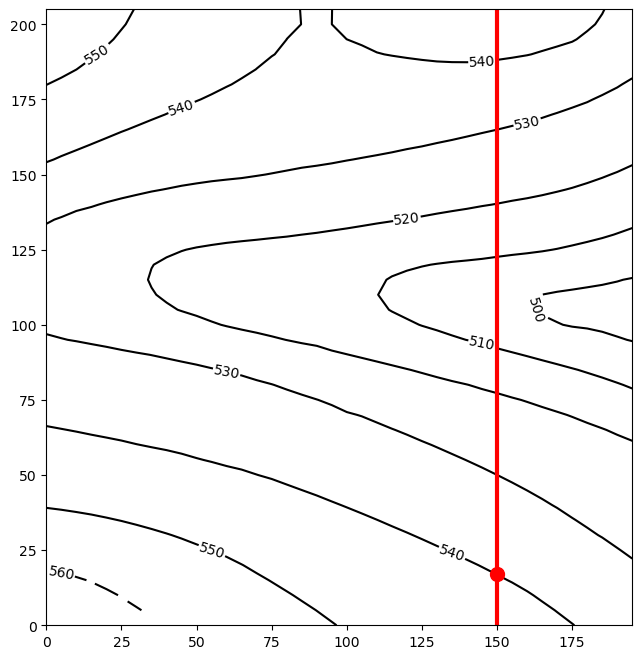

In [3]:
# outcrop trace of vertical plane
strike, dip = np.radians([180, 90]) 
DG = outcrop_trace(strike,dip,point1,XG,YG,ZG)

# plot topo map 
fig, ax = plt.subplots(figsize=(10,8)) # make figure
cs = ax.contour(XG,YG,ZG,levels=c_levels, colors='black') # contour grid
ax.clabel(cs)

# plot outcrop point
ax.plot(point1[0],point1[1],'ro', markersize=10)

# plot outcrop trace = contour zero value of DG
ax.contour(XG,YG,DG,levels=0,colors='red',linewidths=3)

# make axes equal
ax.axis('scaled')

# show the plot
plt.show()

Let's look at a plane dipping 20° to the west:

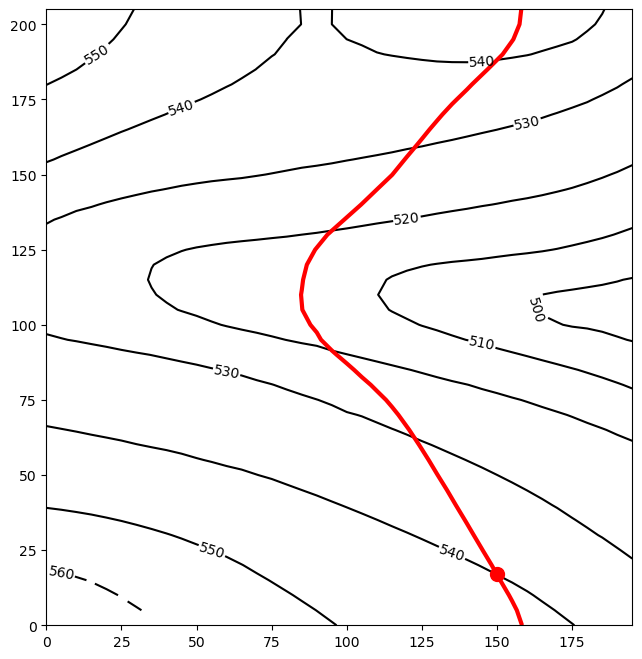

In [4]:
# outcrop trace of plane dipping to the west
# dip is 20 degrees 
strike, dip = np.radians([180, 20]) 
DG = outcrop_trace(strike,dip,point1,XG,YG,ZG)

# plot topo map 
fig, ax = plt.subplots(figsize=(10,8)) # make figure
cs = ax.contour(XG,YG,ZG,levels=c_levels, colors='black') # contour grid
ax.clabel(cs)

# plot outcrop point
ax.plot(point1[0],point1[1],'ro', markersize=10)

# plot outcrop trace = contour zero value of DG
ax.contour(XG,YG,DG,levels=0,colors='red',linewidths=3)

# make axes equal
ax.axis('scaled')

# show the plot
plt.show()

As you can see, the outcrop trace of the plane is a V pointing in the direction of dip, in this case west and up stream. Change the dip of the plane to see how the outcrop trace changes: try dip angles of 10, 30, 50 and 70°. 

Finally, let's look at a plane dipping east. For this case, we move the outcrop location of the plane to the west so that the outcrop trace is in the map.

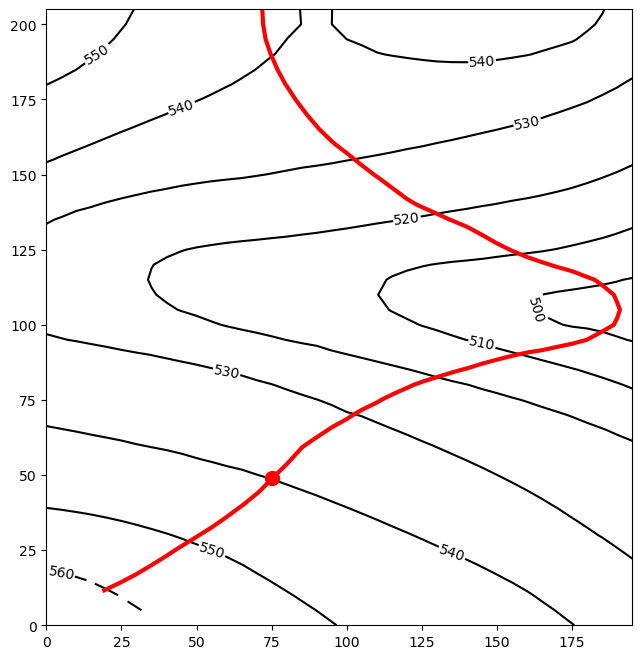

In [5]:
# move outcrop point to the west
point1 = np.array([75, 49, 540]) # E, N, U coordinates

# outcrop trace of plane dipping to the east
# dip is 20 degrees 
strike, dip = np.radians([0, 20]) 
DG = outcrop_trace(strike,dip,point1,XG,YG,ZG)

# plot topo map 
fig, ax = plt.subplots(figsize=(10,8)) # make figure
cs = ax.contour(XG,YG,ZG,levels=c_levels, colors='black') # contour grid
ax.clabel(cs)

# plot outcrop point
ax.plot(point1[0],point1[1],'ro', markersize=10)

# plot outcrop trace = contour zero value of DG
ax.contour(XG,YG,DG,levels=0,colors='red',linewidths=3)

# make axes equal
ax.axis('scaled')

# show the plot
plt.show()

The outcrop trace of the plane is again a V pointing in the direction of dip, in this case east and down stream. Change the dip of the plane to see how the outcrop trace changes: try dip angles of 10, 30, 50 and 70°. 